In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping

2023-08-26 12:57:27.338486: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-26 12:57:27.340819: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-26 12:57:27.388129: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-26 12:57:27.389127: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-26 12:57:28.171562: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [2]:
prom_file_path = "/home/wenjun/integrated_r11n5.parquet"

In [3]:
data = pd.read_parquet(prom_file_path)

In [4]:
data.head()

,id,timestamp,node,node_time_seconds,node_load15,surfsara_power_usage,up,node_netstat_Tcp_OutSegs,node_netstat_Tcp_InErrs,node_context_switches_total,...,FAILED,OUT_OF_MEMORY,NODE_FAIL,jobCount_30s,TIMEOUT_30s,COMPLETED_30s,CANCELLED_30s,FAILED_30s,OUT_OF_MEMORY_30s,NODE_FAIL_30s
1972309,10530208,2022-06-30 16:00:30,r11n5,1.656610e+09,16.08,192.0,1.0,1.001440e+11,0.0,2.568690e+11,...,0,0,0,0,0,0,0,0,0,0
1972589,10530209,2022-06-30 16:01:00,r11n5,1.656610e+09,16.07,192.0,1.0,1.001450e+11,0.0,2.568690e+11,...,0,0,0,0,0,0,0,0,0,0
1972869,10530210,2022-06-30 16:01:30,r11n5,1.656610e+09,16.07,192.0,1.0,1.001460e+11,0.0,2.568690e+11,...,0,0,0,0,0,0,0,0,0,0
1973149,10530211,2022-06-30 16:02:00,r11n5,1.656610e+09,16.07,192.0,1.0,1.001480e+11,0.0,2.568690e+11,...,0,0,0,0,0,0,0,0,0,0
1973429,10530212,2022-06-30 16:02:30,r11n5,1.656610e+09,16.07,192.0,1.0,1.001480e+11,0.0,2.568690e+11,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.columns

Index(['id', 'timestamp', 'node', 'node_time_seconds', 'node_load15',
       'surfsara_power_usage', 'up', 'node_netstat_Tcp_OutSegs',
       'node_netstat_Tcp_InErrs', 'node_context_switches_total', 'node_load5',
       'node_load1', 'node_memory_Active_bytes',
       'node_netstat_Tcp_RetransSegs', 'node_netstat_Udp_InErrors',
       'node_memory_Dirty_bytes', 'surfsara_ambient_temp',
       'node_netstat_Icmp_InMsgs', 'node_netstat_Udp_InDatagrams',
       'node_intr_total', 'node_netstat_Tcp_InSegs',
       'node_memory_Percpu_bytes', 'node_boot_time_seconds',
       'node_netstat_Udp_OutDatagrams', 'node_netstat_Icmp_InErrors',
       'node_procs_blocked', 'node_netstat_Icmp_OutMsgs',
       'node_memory_MemFree_bytes', 'node_procs_running', 'node_forks_total',
       'node_hwmon_temp_celsius-min', 'node_hwmon_temp_celsius-mean',
       'node_hwmon_temp_celsius-max', 'node_filesystem_avail_bytes-sum',
       'node_filesystem_files-sum', 'node_network_transmit_bytes_total-sum',
   

In [6]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [7]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [8]:
# Assuming 'data' is your numpy array and 'column_names' is your list of column names
column_names = ['id', 'timestamp', 'node', 'node_time_seconds', 'node_load15',
       'surfsara_power_usage', 'up', 'node_netstat_Tcp_OutSegs',
       'node_netstat_Tcp_InErrs', 'node_context_switches_total', 'node_load5',
       'node_load1', 'node_memory_Active_bytes',
       'node_netstat_Tcp_RetransSegs', 'node_netstat_Udp_InErrors',
       'node_memory_Dirty_bytes', 'surfsara_ambient_temp',
       'node_netstat_Icmp_InMsgs', 'node_netstat_Udp_InDatagrams',
       'node_intr_total', 'node_netstat_Tcp_InSegs',
       'node_memory_Percpu_bytes', 'node_boot_time_seconds',
       'node_netstat_Udp_OutDatagrams', 'node_netstat_Icmp_InErrors',
       'node_procs_blocked', 'node_netstat_Icmp_OutMsgs',
       'node_memory_MemFree_bytes', 'node_procs_running', 'node_forks_total',
       'node_hwmon_temp_celsius-min', 'node_hwmon_temp_celsius-mean',
       'node_hwmon_temp_celsius-max', 'node_filesystem_avail_bytes-sum',
       'node_filesystem_files-sum', 'node_network_transmit_bytes_total-sum',
       'node_filesystem_device_error-sum', 'node_disk_written_bytes_total-sum',
       'node_filesystem_free_bytes-sum', 'node_thermal_zone_temp-min',
       'node_thermal_zone_temp-mean', 'node_thermal_zone_temp-max',
       'node_disk_read_bytes_total-sum', 'nvidia_gpu_memory_used_bytes-sum',
       'nvidia_gpu_temperature_celsius-min',
       'nvidia_gpu_temperature_celsius-mean',
       'nvidia_gpu_temperature_celsius-max', 'node_arp_entries-sum',
       'nvidia_gpu_fanspeed_percent-min', 'nvidia_gpu_fanspeed_percent-mean',
       'nvidia_gpu_fanspeed_percent-max', 'node_filesystem_files_free-sum',
       'nvidia_gpu_power_usage_milliwatts-min',
       'nvidia_gpu_power_usage_milliwatts-sum',
       'nvidia_gpu_power_usage_milliwatts-mean',
       'nvidia_gpu_power_usage_milliwatts-max',
       'node_filesystem_size_bytes-sum',
       'node_disk_writes_completed_total-sum', 'nvidia_gpu_duty_cycle-min',
       'nvidia_gpu_duty_cycle-mean', 'nvidia_gpu_duty_cycle-max',
       'node_network_transmit_packets_total-sum', 'node_udp_queues-sum',
       'node_network_receive_bytes_total-sum',
       'node_network_receive_packets_total-sum',
       'node_network_receive_multicast_total-sum', 'node_disk_io_now-sum',
       'node_rapl_package_joules_total-sum',
       'node_network_receive_drop_total-sum', 'jobID', 'TIMEOUT', 'COMPLETED',
       'CANCELLED', 'FAILED', 'OUT_OF_MEMORY', 'NODE_FAIL', 'jobCount_30s',
       'TIMEOUT_30s', 'COMPLETED_30s', 'CANCELLED_30s', 'FAILED_30s',
       'OUT_OF_MEMORY_30s', 'NODE_FAIL_30s']  
df = pd.DataFrame(data, columns=column_names)

In [9]:
column = ['node_netstat_Tcp_OutSegs','node_netstat_Tcp_RetransSegs','node_intr_total','node_netstat_Tcp_InSegs','node_procs_running','node_hwmon_temp_celsius-mean','node_network_transmit_bytes_total-sum','node_thermal_zone_temp-mean','node_arp_entries-sum','node_network_transmit_packets_total-sum','node_network_receive_bytes_total-sum','node_network_receive_packets_total-sum']
X = df[column]
y = df['node_load1']

In [10]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming `X` and `y` are your data where X is a 2D numpy array with multiple features and y is a 1D array

# Normalize your data
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X = scaler_x.fit_transform(X)
y = scaler_y.fit_transform(y.values.reshape(-1, 1)) # Reshape y to a 2D array
 # Reshape y to a 2D array

# Function to convert data into X (features) and Y (labels) for the LSTM
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps), :]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

# Create a dataset using the function above
time_steps = 3
X, y = create_dataset(X, y, time_steps)

# Define the LSTM model
def create_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Time series cross-validator
tscv = TimeSeriesSplit(n_splits=5)

mse_scores = []

for train_index, test_index in tscv.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model = create_model((X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, y_train, epochs=20, verbose=1)

    # make predictions on the test data
    y_pred = model.predict(X_test)

    # revert the prediction and the target to the original scale
    y_test = scaler_y.inverse_transform(y_test)
    y_pred = scaler_y.inverse_transform(y_pred)

    # compute the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

print("Mean MSE over all splits: ", np.mean(mse_scores))


Epoch 1/20
2127/2127 [==============================] - 12s 5ms/step - loss: 2.5882e-04
Epoch 2/20
2127/2127 [==============================] - 10s 5ms/step - loss: 1.1441e-04
Epoch 3/20
2127/2127 [==============================] - 10s 5ms/step - loss: 1.0306e-04
Epoch 4/20
2127/2127 [==============================] - 10s 5ms/step - loss: 9.3664e-05
Epoch 5/20
2127/2127 [==============================] - 10s 5ms/step - loss: 9.5418e-05
Epoch 6/20
2127/2127 [==============================] - 10s 5ms/step - loss: 8.4414e-05
Epoch 7/20
2127/2127 [==============================] - 10s 5ms/step - loss: 8.2315e-05
Epoch 8/20
2127/2127 [==============================] - 10s 5ms/step - loss: 7.6100e-05
Epoch 9/20
2127/2127 [==============================] - 10s 5ms/step - loss: 6.7857e-05
Epoch 10/20
2127/2127 [==============================] - 10s 5ms/step - loss: 6.7018e-05
Epoch 11/20
2127/2127 [==============================] - 10s 5ms/step - loss: 6.6882e-05
Epoch 12/20
2127/2127 [=======

In [14]:
def relative_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true))

relative_errors = []

for train_index, test_index in tscv.split(X):
    # ... [rest of your loop code before mse computation]
    
    # compute the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    # compute the relative error for this fold and append to the list
    rel_error = relative_error(y_test, y_pred)
    relative_errors.append(rel_error)

print("Mean MSE over all splits: ", np.mean(mse_scores))
print("Mean Relative Error over all splits: ", np.mean(relative_errors))

Mean MSE over all splits:  16.353538938865505
Mean Relative Error over all splits:  inf


/tmp/ipykernel_619440/3661592525.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true))
/tmp/ipykernel_619440/3661592525.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true))
/tmp/ipykernel_619440/3661592525.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true))
/tmp/ipykernel_619440/3661592525.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true))
/tmp/ipykernel_619440/3661592525.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true))


In [11]:
column_job = ['node_netstat_Tcp_OutSegs','node_netstat_Tcp_RetransSegs','node_intr_total','node_netstat_Tcp_InSegs','node_procs_running','node_hwmon_temp_celsius-mean','node_network_transmit_bytes_total-sum','node_thermal_zone_temp-mean','node_arp_entries-sum','node_network_transmit_packets_total-sum','node_network_receive_bytes_total-sum','node_network_receive_packets_total-sum','jobID', 'TIMEOUT', 'COMPLETED',
       'CANCELLED', 'FAILED', 'OUT_OF_MEMORY', 'NODE_FAIL', 'jobCount_30s',
       'TIMEOUT_30s', 'COMPLETED_30s', 'CANCELLED_30s', 'FAILED_30s',
       'OUT_OF_MEMORY_30s', 'NODE_FAIL_30s']
X_job = df[column_job]
y_job = df['node_load1']

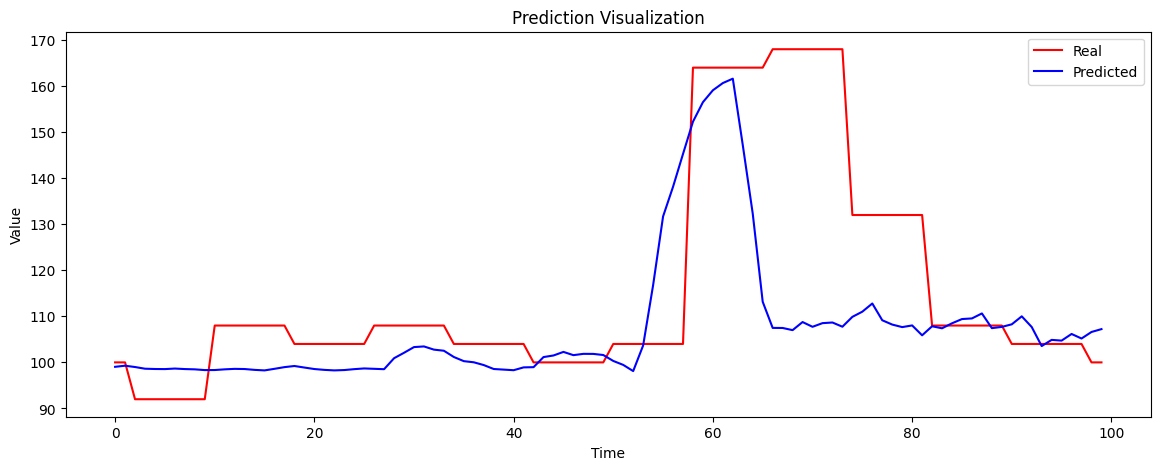

In [ ]:
import matplotlib.pyplot as plt

# Visualizing the results
plt.figure(figsize=(14,5))
plt.plot(y_test[:100], color = 'red', label = 'Real')
plt.plot(y_pred[:100], color = 'blue', label = 'Predicted')
plt.title('Prediction Visualization')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
